In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [88]:
customer_case_df =  pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [89]:
customer_case_df.drop(columns = ["Unnamed: 0"], inplace = True)

In [90]:
customer_case_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### Removing all missing values

In [91]:
customer_case_df.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [92]:
# I will drop column Vehicle Type, it has a lot of missing values.

customer_case_df.drop(columns = ["Vehicle Type"], inplace = True)

In [93]:
# I will change missing values for State

customer_case_df["State"] = customer_case_df["State"].fillna("Unknown")

In [94]:
# I will change missing values for Response

customer_case_df["Response"] = customer_case_df["Response"].fillna("Unknown")

In [95]:
# I will change missing values for Vehicle Class

customer_case_df["Vehicle Class"] = customer_case_df["Vehicle Class"].fillna("Unknown")

In [96]:
# I will change missing values for Vehicle Size

customer_case_df["Vehicle Size"] = customer_case_df["Vehicle Size"].fillna("Unknown")

In [97]:
# I will change missing values for Months Since Last Claim with 

months_last_claim_mean = customer_case_df["Months Since Last Claim"].median()
months_last_claim_mean

14.0

In [98]:
customer_case_df["Months Since Last Claim"] = customer_case_df["Months Since Last Claim"].fillna(months_last_claim_mean)

In [99]:
# I will change missing values for Number Of Open Complaints with median of the column

nr_of_open_complaints_median = customer_case_df["Number of Open Complaints"].median()
nr_of_open_complaints_median

0.0

In [100]:
customer_case_df["Number of Open Complaints"] = customer_case_df["Number of Open Complaints"].fillna(nr_of_open_complaints_median)

In [101]:
# Checking again the missing values in my dataframe

customer_case_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [102]:
# I will replace all 0 values in income column with a mean (calculated without 0 values)

In [103]:
round(customer_case_df[customer_case_df["Income"] != 0]["Income"].mean(), 3)

50414.978

In [104]:
customer_case_df["Income"].replace({0: 50414.978}, inplace = True)

customer_case_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029.000,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,50414.978,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139.000,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078.000,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.000,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,50414.978,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146.000,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837.000,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195.000,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


### X, Y split. I will remove the target variable - Total Claim Amount - from the dataframe

In [105]:
X = customer_case_df.drop("Total Claim Amount", axis = 1)
y = customer_case_df["Total Claim Amount"]

In [106]:
X = X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.000,61,7.0,52,0.0,9
1,2228.525238,50414.978,64,3.0,26,0.0,1
2,14947.917300,22139.000,100,34.0,31,0.0,2
3,22332.439460,49078.000,97,10.0,3,0.0,2
4,9025.067525,23675.000,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7
10906,5259.444853,61146.000,65,7.0,68,0.0,6
10907,23893.304100,39837.000,201,11.0,63,0.0,2
10908,11971.977650,64195.000,158,0.0,27,4.0,6


### Normalize numerical columns

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

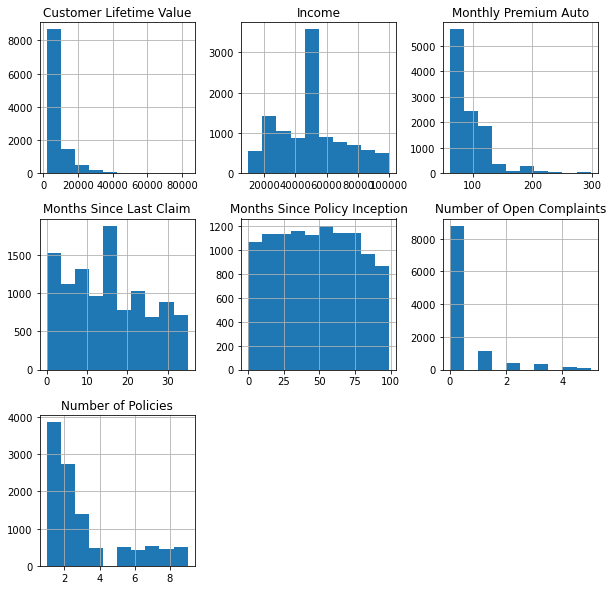

In [107]:
# I will check the distribution of all numerical columns.

X.hist(figsize = (10,10))

In [108]:
# Powertransformer didn't improve the distributions.
# I will try quantile transformer.

X_normalized = quantile_transform(X, output_distribution = "normal")
X_normalized

array([[-0.3938996 , -0.33037033, -5.19933758, ...,  0.11062728,
        -5.19933758,  5.19933758],
       [-2.34750351,  0.04392402, -1.25024186, ..., -0.62262111,
        -5.19933758, -5.19933758],
       [ 1.23864493, -1.34147144,  0.39249204, ..., -0.46400712,
        -5.19933758, -0.05020383],
       ...,
       [ 1.7515682 , -0.51264927,  2.11015682, ...,  0.42385485,
        -5.19933758, -0.05020383],
       [ 0.98899945,  0.73268682,  1.62214905, ..., -0.59244364,
         2.19689385,  1.00621052],
       [ 0.18724753,  0.04392402,  0.41563423, ..., -2.19689385,
        -5.19933758,  0.43762015]])

In [109]:
## X_normalized.np.histogram(figsize = (10,10))

In [110]:
# I will use Standardscaler.
# It didn't work with powertransformer for any variable.

std_scaler = StandardScaler().fit(X) 

X_scaled = std_scaler.transform(X)

In [111]:
print(X_scaled)

[[-4.66105048e-01 -1.13983286e-01 -9.34819038e-01 ...  1.39876544e-01
  -4.06655898e-01  2.50945468e+00]
 [-8.40945931e-01 -3.09139667e-09 -8.47713435e-01 ... -7.90709107e-01
  -4.06655898e-01 -8.24922055e-01]
 [ 1.00652314e+00 -1.35080407e+00  1.97553805e-01 ... -6.11750328e-01
  -4.06655898e-01 -4.08124962e-01]
 ...
 [ 2.30582467e+00 -5.05332682e-01  3.13010912e+00 ...  5.33585858e-01
  -4.06655898e-01 -4.08124962e-01]
 [ 5.74273203e-01  6.58301180e-01  1.88159547e+00 ... -7.54917351e-01
   4.08725734e+00  1.25906341e+00]
 [-1.68592685e-01 -3.09139667e-09  2.26589006e-01 ... -1.68550300e+00
  -4.06655898e-01  8.67213015e-03]]


In [112]:
# Assign it back to the dataframe and then check the distribution again

### One Hot for categorical variables.

In [113]:
categorical_features = customer_case_df.select_dtypes("object")
categorical_features

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [114]:
categorical_features.drop(columns = ["Customer"], inplace = True)
categorical_features.drop(columns = ["Effective To Date"], inplace = True)
categorical_features

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [115]:
categorical_dummies = pd.get_dummies(categorical_features, drop_first=True)
categorical_dummies

,State_California,State_Nevada,State_Oregon,State_Unknown,State_Washington,Response_Unknown,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


### Day 2. Train-test split.

In [116]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.000,61,7.0,52,0.0,9
1,2228.525238,50414.978,64,3.0,26,0.0,1
2,14947.917300,22139.000,100,34.0,31,0.0,2
3,22332.439460,49078.000,97,10.0,3,0.0,2
4,9025.067525,23675.000,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7
10906,5259.444853,61146.000,65,7.0,68,0.0,6
10907,23893.304100,39837.000,201,11.0,63,0.0,2
10908,11971.977650,64195.000,158,0.0,27,4.0,6


In [117]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,random_state = 123)

### I will standardize X_train and X_test

In [119]:
std_scaler = StandardScaler().fit(X_train)

X_train_scaled = std_scaler.transform(X_train)

print(X_train_scaled)

[[-6.70129508e-01 -8.50078307e-01 -1.77408046e-01 ... -1.01395735e-02
  -4.07820459e-01 -8.23324989e-01]
 [ 3.04436074e+00 -7.18525577e-01  4.22263292e+00 ... -1.00885254e+00
  -4.07820459e-01 -4.08347894e-01]
 [-7.21338256e-02  2.21652770e+00  5.41730577e-02 ... -1.11585750e+00
   7.26383782e-01  1.25156048e+00]
 ...
 [ 9.78796193e-01  3.51845728e-03  1.32786913e+00 ...  2.75206987e-01
  -4.07820459e-01 -4.08347894e-01]
 [ 5.21054160e+00 -1.30872860e+00  1.12523566e+00 ...  8.10231789e-01
  -4.07820459e-01 -4.08347894e-01]
 [-8.01183967e-01  1.27255971e+00 -8.43203718e-01 ...  7.03226828e-01
  -4.07820459e-01 -8.23324989e-01]]


In [120]:
X_test_scaled = std_scaler.transform(X_test)

print(X_test_scaled)

[[-0.82006016  0.00351846 -0.61162261 ... -1.57954566 -0.40782046
  -0.82332499]
 [-0.28953319 -1.44409096 -0.49583206 ...  0.41788027  0.72638378
   0.4216063 ]
 [-0.38514774  1.00516239 -0.7563608  ... -1.22286246 -0.40782046
   1.25156048]
 ...
 [-0.74223931  1.45865281 -0.55372734 ... -1.61521398 -0.40782046
  -0.82332499]
 [ 0.63136522 -0.67579987  1.79103133 ... -0.97318422 -0.40782046
   0.4216063 ]
 [ 0.14524812  0.00351846  0.98049747 ... -0.83051094 -0.40782046
   0.4216063 ]]


### Apply linear regression.

In [121]:
model = LinearRegression()   
model.fit(X_train_scaled, y_train)

LinearRegression()

In [122]:
# Finding parameters - b1, b2, b3 etc.

model.coef_

array([ -7.43314227, -45.01804365, 186.23017426,   3.23090059,
        -4.98897732,  -1.31006222,   0.64334328])

In [123]:
# Finding b0.

model.intercept_

434.1323053463402

In [124]:
# Finding predicted y values.

y_predicted = model.predict(X_test_scaled) 

y_predicted

array([337.36790014, 406.20338565, 257.01936768, ..., 282.5722605 ,
       796.10721291, 620.12391051])

In [125]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [126]:
len(y_predicted)

3273

In [127]:
len(y_test)

3273

In [128]:
# Now we can compare some y and y_predicted values.

In [129]:
# I will put y values and y_predicted values into a new dataframe.

result = pd.DataFrame({"y_test":y_test,"y_predicted":y_predicted})

In [130]:
result

,y_test,y_predicted
1183,518.400000,337.367900
2111,364.800000,406.203386
7971,29.984815,257.019368
7189,166.937747,540.181266
3103,556.800000,528.162810
...,...,...
5104,350.400000,383.307483
1632,934.656068,683.286909
9488,97.928632,282.572260
1303,388.148089,796.107213


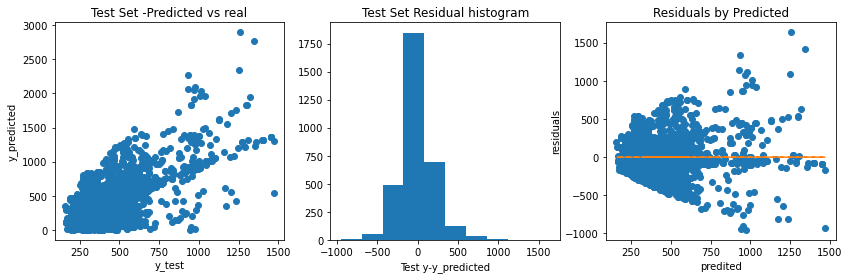

In [131]:
# I will make plots to 

#                      1. see the relationship between y and y_predicted

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_predicted, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_predicted")
ax[0].set_title("Test Set -Predicted vs real")

#                      2. histogram to see the distribution of errors

ax[1].hist(y_test - y_predicted)
ax[1].set_xlabel("Test y-y_predicted")
ax[1].set_title("Test Set Residual histogram")

#                      3. if errors variance is fairly constant

ax[2].plot(y_predicted,y_test - y_predicted,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_predicted,np.zeros(len(y_predicted)),linestyle='dashed')

In [132]:
# Interpretation (OLS)
# The first plot shows a linear relationship - good.
# The second one should be normal distribution - it is.
# The third is pretty ok, because we can see that the variances are almost similar.

### Model evaluation

In [133]:
# Finding MSE, MAE, RMSE

import math
print(mse(y_test,y_predicted))
print(mae(y_test,y_predicted))
print(math.sqrt(mse(y_test,y_predicted)))

48408.84505853456
150.43434091461316
220.02010148741994


In [134]:
# MSE tells how close a regression line is to a set of points. 
# MAE tells us how big of an error we can expect from the forecast on average.
# RMSE tells us the average distance between the predicted values from the model and the actual values in the dataset.
# The lower the better.

### Calculating R2 and adjusted R2

In [135]:
R2=r2_score(y_test,y_predicted)
R2

0.4399038019019683

In [136]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.438702983100533

### Feature importance

In [137]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [138]:
features_importances

,Attribute,Importance
2,Monthly Premium Auto,186.230174
1,Income,45.018044
0,Customer Lifetime Value,7.433142
4,Months Since Policy Inception,4.988977
3,Months Since Last Claim,3.230901
5,Number of Open Complaints,1.310062
6,Number of Policies,0.643343


In [139]:
# The bigger the Importance the bigger effect it has for the model.